## Import

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor

In [3]:
from ML.utils.utils import *
from ML.utils.Data_preparator import Data_preparator
from ML.utils.Model_evaluator import Model_evaluator
from physics.Iso_data_handler import Iso_data_handler
from physics.Data_visualiser import Data_visualiser

In [ ]:
pre_path = "../../../../../../../"
physical_model = "MIST"
path_to_data = pre_path + "data/MIST_v1.2_vvcrit0.0_basic_isos/"
path_to_results = pre_path + "results/default_models/"
path_to_predictions = pre_path + "predictions/default_models/"
tag = "T_eff_bigger_3_9"

## Data preparation

This notebook contains the results of the model which are trained using all the data from MIST and filtered on the phases

Reading MIST dataframe from csv file...


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,3.486221,3.131342,-1.0,-0.25,0.100000,0.153402
1,5.0,3.487362,3.126808,-1.0,-0.25,0.102645,0.160326
2,5.0,3.489243,3.119367,-1.0,-0.25,0.107039,0.171785
3,5.0,3.491102,3.112165,-1.0,-0.25,0.111419,0.183099
4,5.0,3.492937,3.105143,-1.0,-0.25,0.115789,0.194305
...,...,...,...,...,...,...,...
1467117,10.3,4.402490,7.777159,6.0,0.50,0.532726,-1.806255
1467118,10.3,4.387132,7.783242,6.0,0.50,0.532730,-1.809295
1467119,10.3,4.371789,7.789130,6.0,0.50,0.532735,-1.812237
1467120,10.3,4.356480,7.794844,6.0,0.50,0.532741,-1.815091


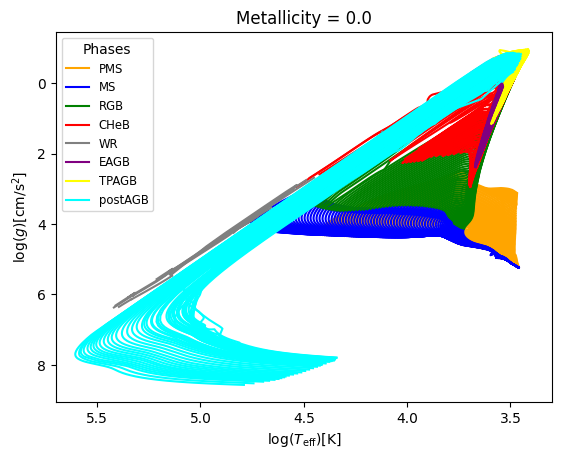

In [5]:
iso_handler = Iso_data_handler(path_to_data, 
                              ['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'phase', 'metallicity', 'star_mass', 'log_R'], 
                              physical_model, reclassify=True)

iso_df = iso_handler.get_isochrone_dataframe()
display(iso_df)
data_visualiser = Data_visualiser(iso_df, physical_model)
data_visualiser.plot_Kiel([], [0.0])

In [6]:
print_uniques("log_Teff", iso_df)
# print_uniques_count("log_Teff", iso_df)

log_Teff : 1467122 unique values, range [3.3446573874911043, 5.605500299983011]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.0,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.0,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.0,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.0,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.0,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
1140739,10.3,3.425746,-0.551440,5.0,0.50,0.602856,2.384899
1140740,10.3,3.426469,-0.560350,5.0,0.50,0.598549,2.387797
1140741,10.3,3.427744,-0.566057,5.0,0.50,0.594116,2.389036
1140742,10.3,3.429413,-0.569225,5.0,0.50,0.589648,2.388981


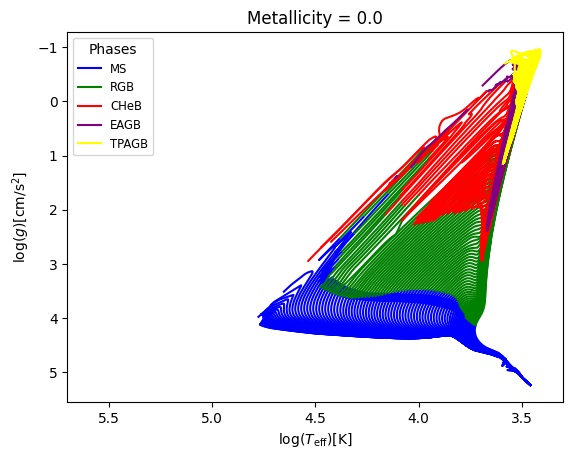

In [7]:
phase_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5]})
display(phase_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [8]:
print_uniques("log_Teff", phase_filtered_iso_df)
# print_uniques_count("log_Teff", phase_filtered_iso_df)

log_Teff : 1140744 unique values, range [3.344668191350628, 5.378801600728572]


,log10_isochrone_age_yr,log_Teff,log_g,phase,metallicity,star_mass,log_R
0,5.00,4.494412,4.346972,0.0,-0.25,13.584360,0.610679
1,5.00,4.497517,4.345776,0.0,-0.25,13.765512,0.614753
2,5.00,4.500556,4.344580,0.0,-0.25,13.942887,0.618755
3,5.00,4.504040,4.343050,0.0,-0.25,14.591712,0.624670
4,5.00,4.507576,4.341483,0.0,-0.25,15.426062,0.631187
...,...,...,...,...,...,...,...
362807,8.85,3.908538,3.617525,0.0,0.50,2.497949,0.609081
362808,8.85,3.907040,3.618806,0.0,0.50,2.497977,0.608443
362809,8.85,3.905338,3.619194,0.0,0.50,2.498004,0.608251
362810,8.85,3.903468,3.618535,0.0,0.50,2.498031,0.608583


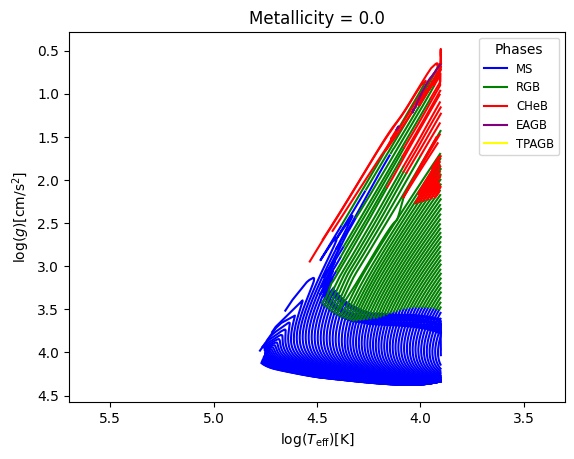

In [9]:
phase_Teff_filtered_iso_df = Data_preparator.filter_data(iso_df, {'phase':[0, 2, 3, 4, 5], 'log_Teff' : (">", 3.9)})
display(phase_Teff_filtered_iso_df)
data_visualiser_phase_filtered = Data_visualiser(phase_Teff_filtered_iso_df, physical_model)
data_visualiser_phase_filtered.plot_Kiel([], [0.0])

In [10]:
print_all_uniques(phase_Teff_filtered_iso_df)

log10_isochrone_age_yr  : Range : 5.0 - 10.3, Mean : 7.3212, Median : 7.25

log_Teff  : Range : 3.9 - 5.3788, Mean : 4.2832, Median : 4.2747

log_g  : Range : 0.48 - 6.2594, Mean : 3.7767, Median : 3.989

Values in phase column : 0.0, 2.0, 3.0, 4.0, 5.0 

Values in metallicity column : -0.25, -0.5, -0.75, -1.0, -1.25, -1.5, -1.75, -2.0, -2.5, -3.0, -3.5, -4.0, 0.0, 0.25, 0.5 

star_mass  : Range : 0.65 - 298.5448, Mean : 18.8169, Median : 7.0142

log_R  : Range : -0.35 - 2.8499, Mean : 0.7841, Median : 0.6863



In [11]:
X_train, X_ivs, y_train, y_ivs = \
    Data_preparator.split_data(phase_Teff_filtered_iso_df, x_cols=['log10_isochrone_age_yr', 'log_Teff', 'log_g', 'metallicity'], 
                               y_cols=['star_mass', 'log_R'], random_state=12, print_stats=True)

print(X_train.shape, X_ivs.shape)
print(y_train.shape, y_ivs.shape)

Training set statistics:
Range in train data for the mass parameter : 0.651737313940729 - 298.5447575808816
Median value in train data for the mass parameter: 7.022611964894232
Mean value in train data for the mass parameter: 18.84070896548715
Range in train data for the radius parameter : -0.3435649376515957 - 2.848971271877089
Median value in train data for the radius parameter: 0.6870549862605257
Mean value in train data for the radius parameter: 0.7845295270444278

Testing set statistics:
Range in test data for the mass parameter : 0.651736427279065 - 296.5221171165397
Median value in test data for the mass parameter: 6.988472126068427
Mean value in test data for the mass parameter: 18.745491245578524
Range in test data for the radius parameter : -0.3461949526594047 - 2.849883386403914
Median value in test data for the radius parameter: 0.6834434776262646
Mean value in test data for the radius parameter: 0.7828842451352801

(272109, 4) (90703, 4)
(272109, 2) (90703, 2)


## Model training

### Linear regression

In [11]:
lr_evaluator = Model_evaluator("linear_regression", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.37243589429591095
RMSE :  26.438310604244865
MAE :  15.32762456828805
MedAE :  12.588901270127865
CORR :  0.6102752615423126
MAX_ER :  244.7423918697257
Percentiles : 
  75th percentile :  17.204190205276543
  90th percentile :  20.161962967846897
  95th percentile :  33.33954223963876
  99th percentile :  132.78416442163436



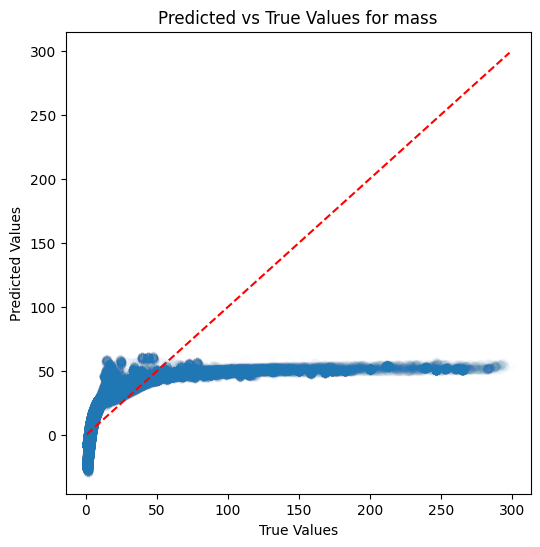

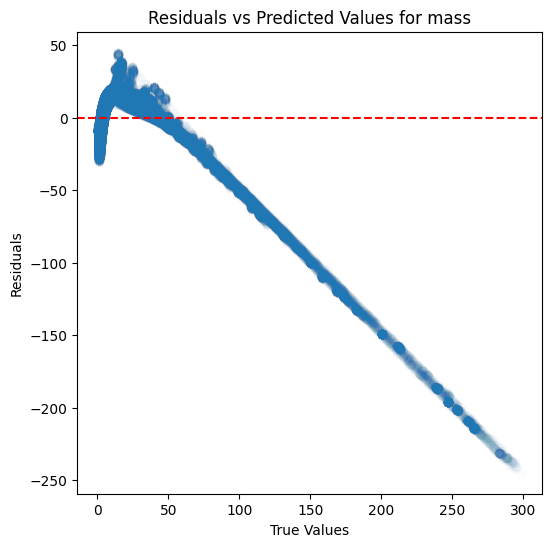

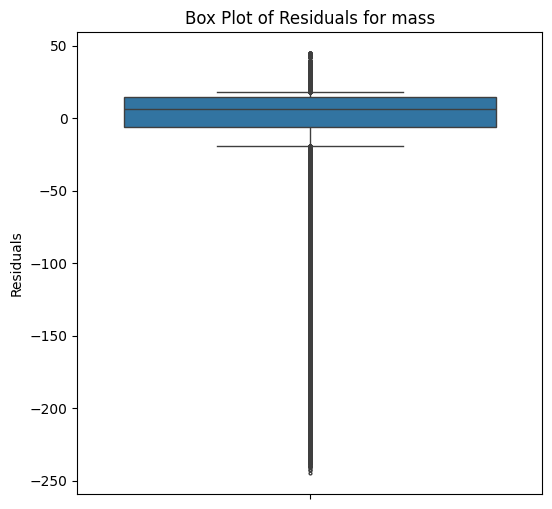

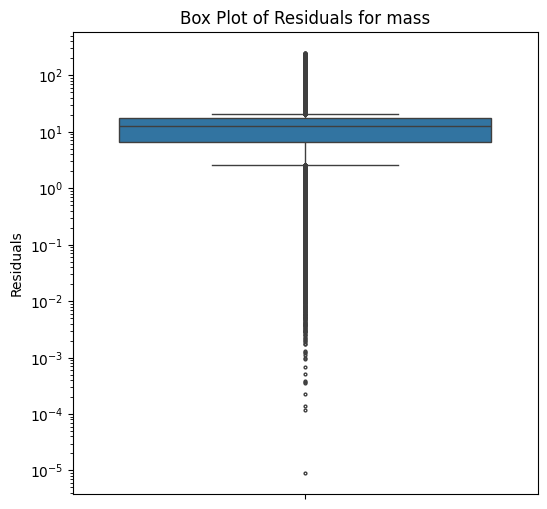

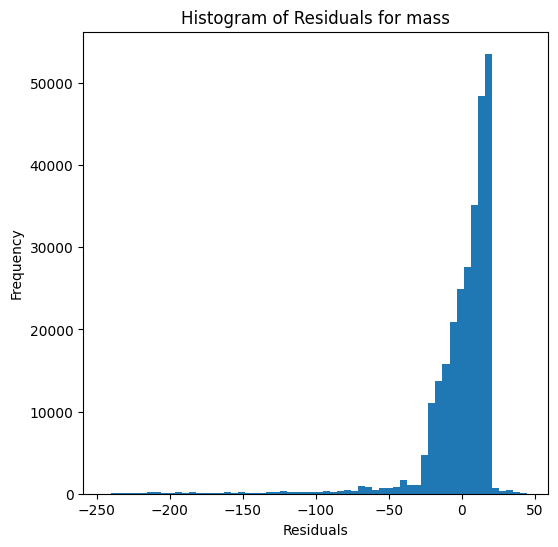

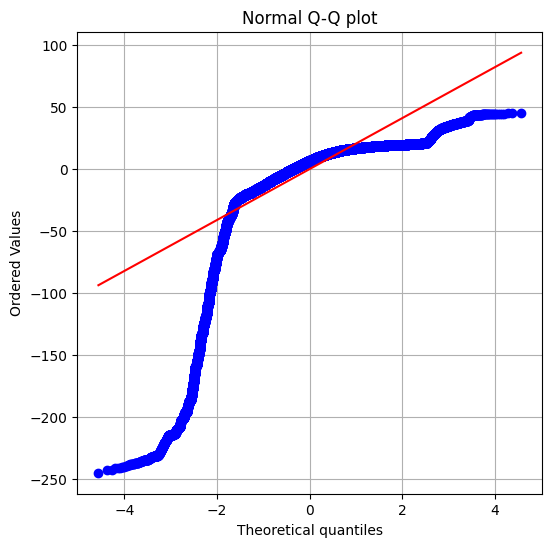


radius results:
RVE :  0.9847700421108778
RMSE :  0.07139197740977672
MAE :  0.051359068625673306
MedAE :  0.04133281392855803
CORR :  0.9923558041906719
MAX_ER :  0.38214071553951623
Percentiles : 
  75th percentile :  0.06279418938192205
  90th percentile :  0.09527008697858688
  95th percentile :  0.14352303361361185
  99th percentile :  0.27460446783429254



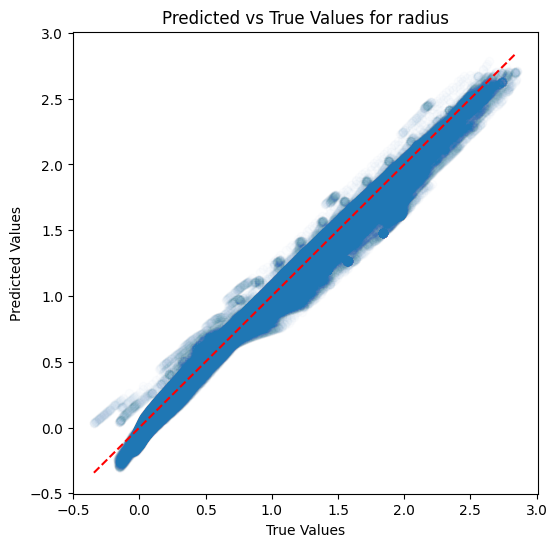

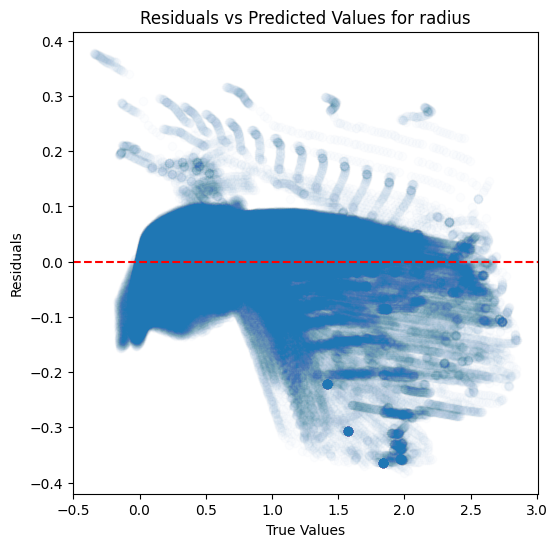

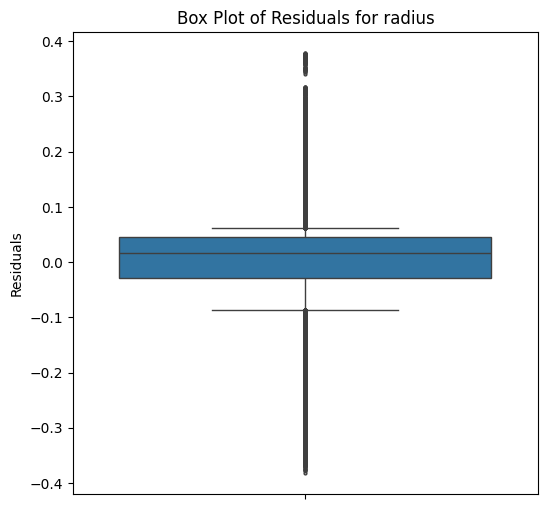

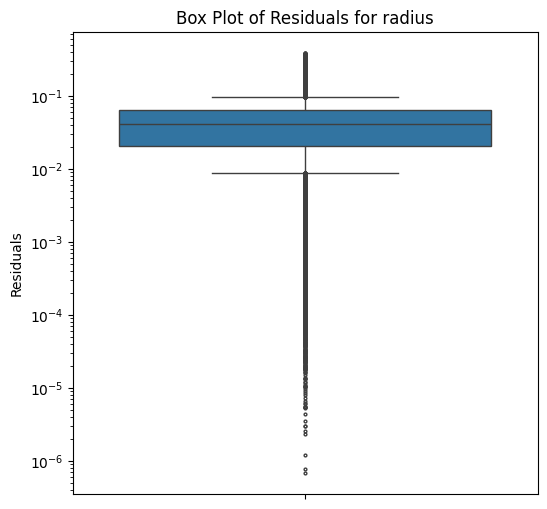

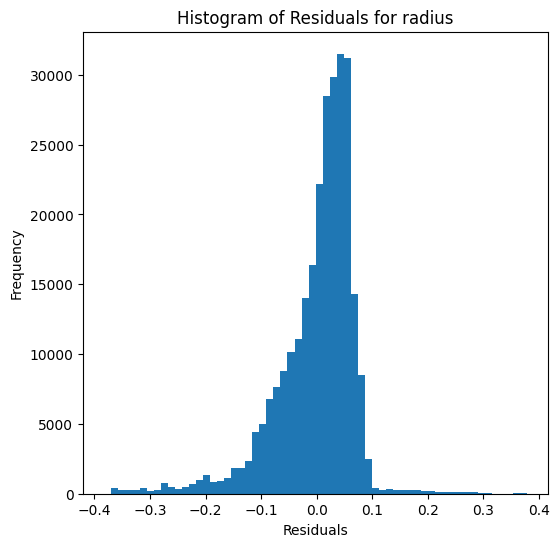

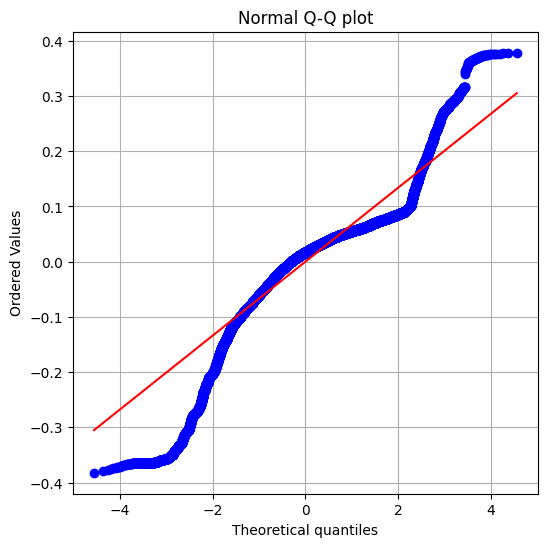

In [12]:
lr_evaluator.evaluate_Kfold_results(LinearRegression, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Decision tree

In [13]:
dt_evaluator = Model_evaluator("decision_tree", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9939342314753172
RMSE :  2.5992587561609355
MAE :  0.34488091644330826
MedAE :  0.007374718291960569
CORR :  0.9969691344866749
MAX_ER :  180.63634974060102
Percentiles : 
  75th percentile :  0.04360128301906352
  90th percentile :  0.25607164950564043
  95th percentile :  0.9441052895714492
  99th percentile :  7.646496863829876



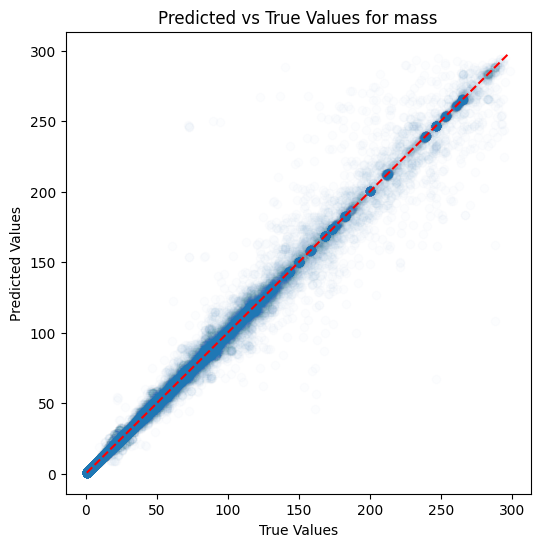

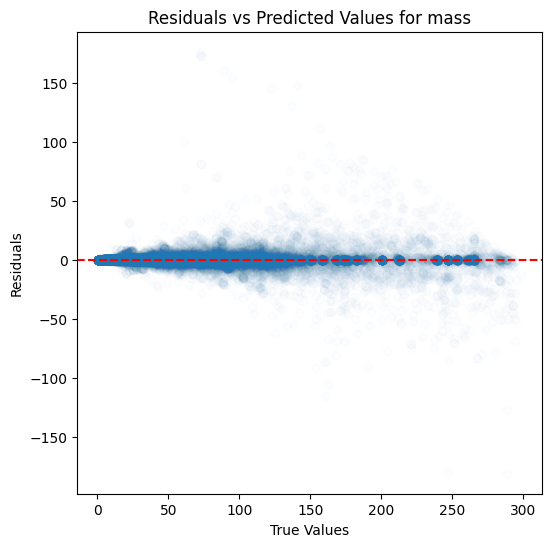

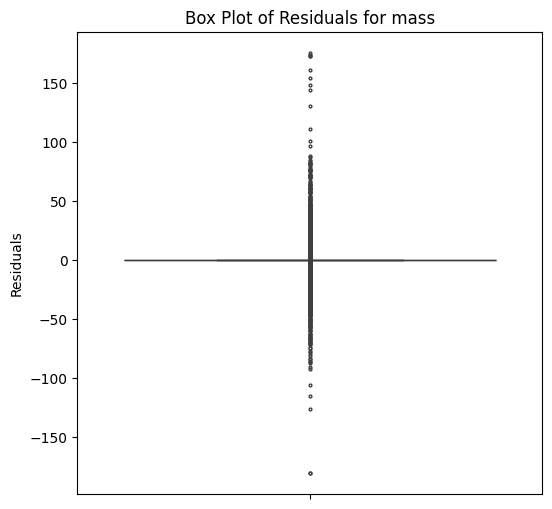

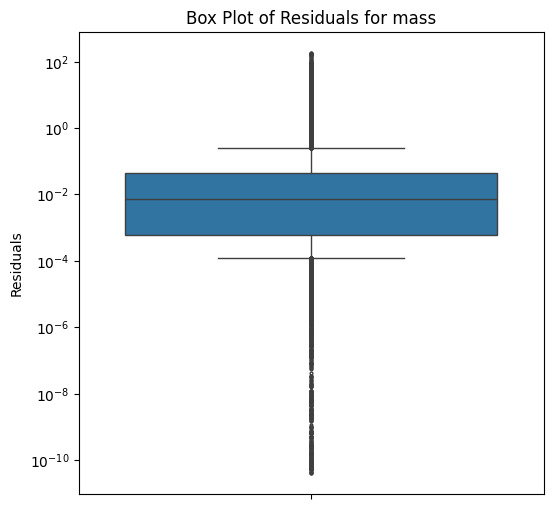

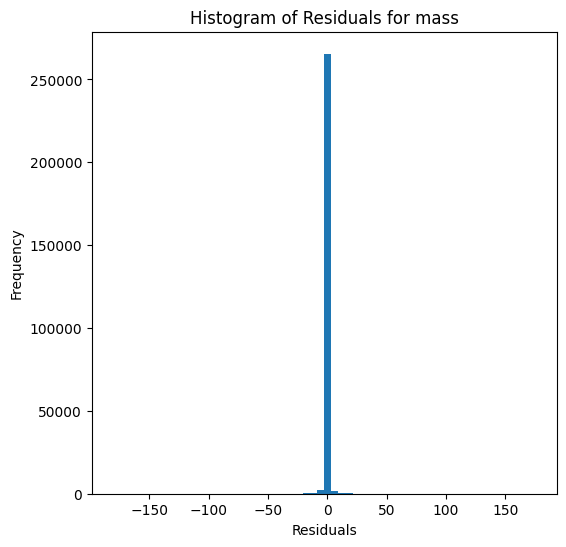

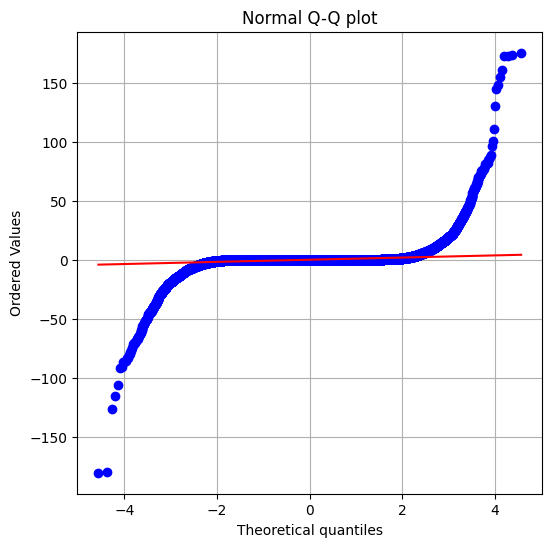


radius results:
RVE :  0.999622839291098
RMSE :  0.01123734853038741
MAE :  0.006261813666667893
MedAE :  0.003891141754820082
CORR :  0.9998114363898158
MAX_ER :  0.6721575042912842
Percentiles : 
  75th percentile :  0.0075387496200324255
  90th percentile :  0.013465037300285011
  95th percentile :  0.019399776396143074
  99th percentile :  0.04146503649673323



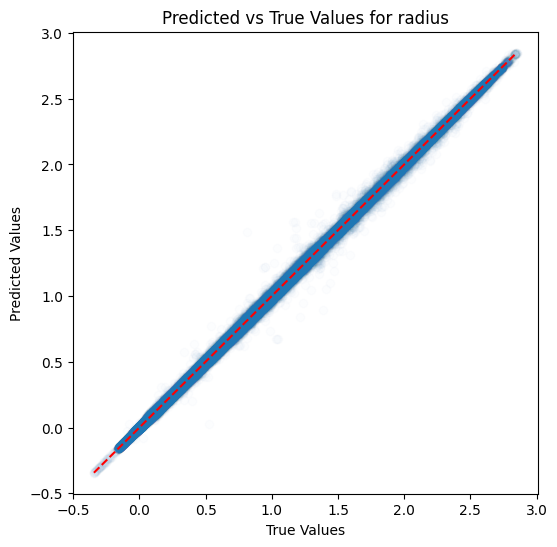

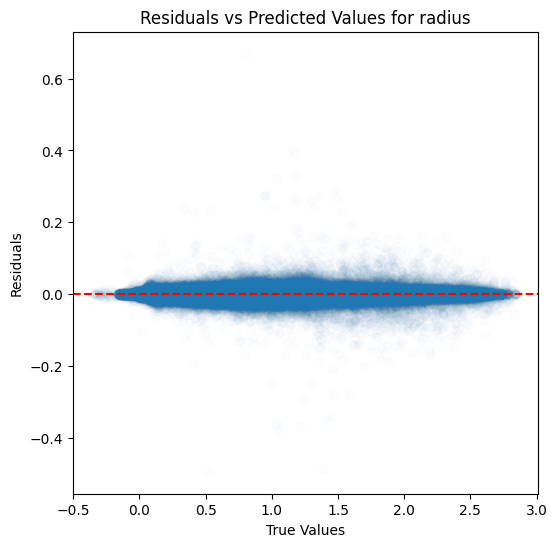

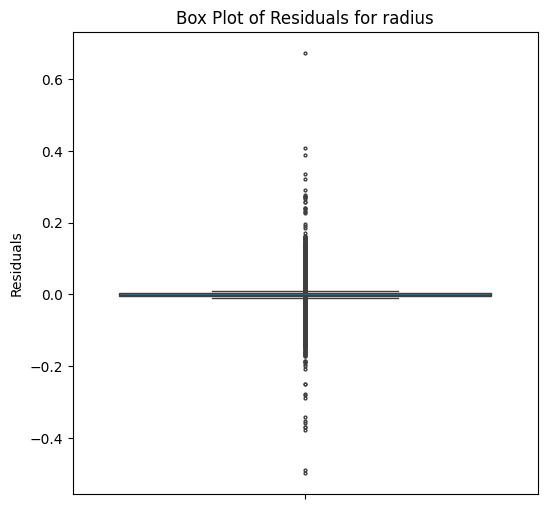

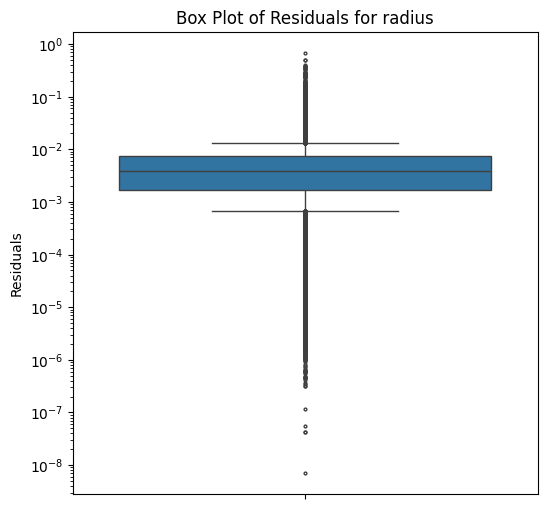

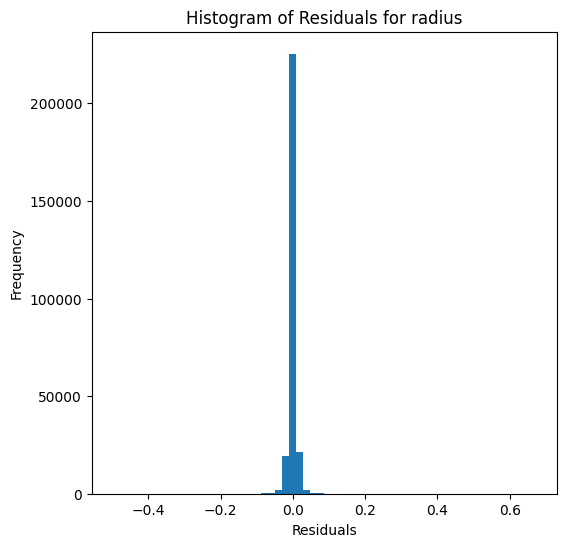

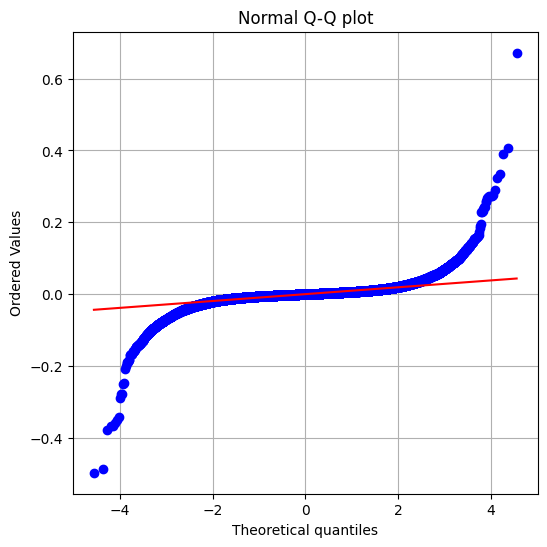

In [14]:
dt_evaluator.evaluate_Kfold_results(DecisionTreeRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### K-nearest neighbours

In [15]:
knn_evaluator = Model_evaluator("KNN", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9887020117783859
RMSE :  3.5485326646618143
MAE :  0.5507672621608236
MedAE :  0.019106616907248686
CORR :  0.9944437625641991
MAX_ER :  145.07704947334054
Percentiles : 
  75th percentile :  0.09564389713269339
  90th percentile :  0.5643212787150155
  95th percentile :  1.7661035545359411
  99th percentile :  11.229073479822496



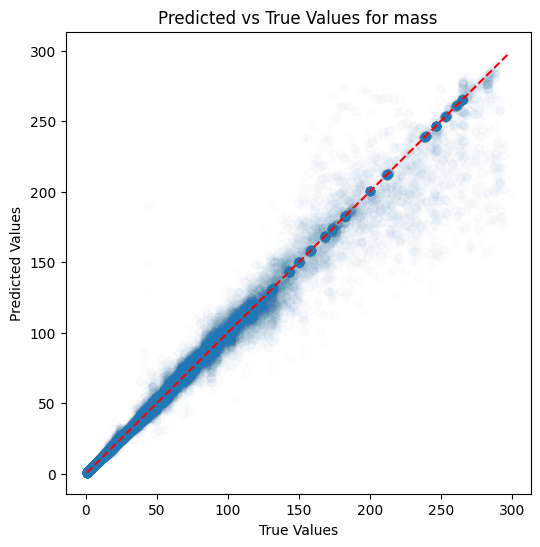

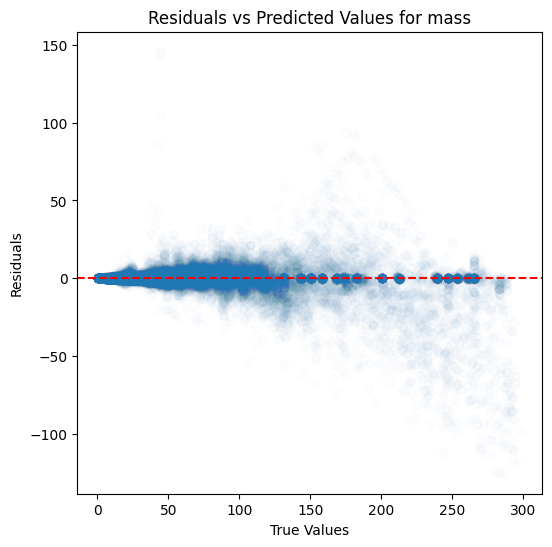

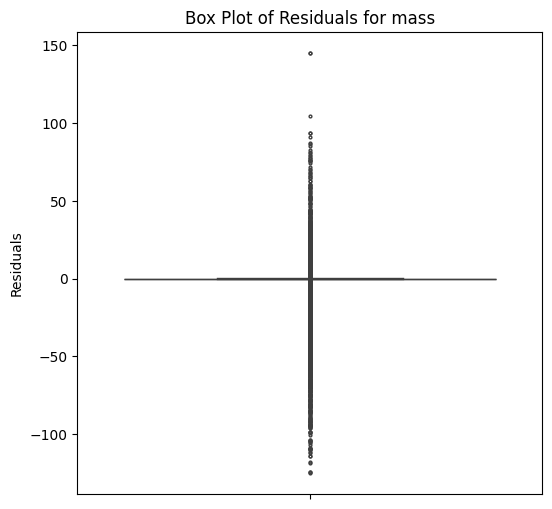

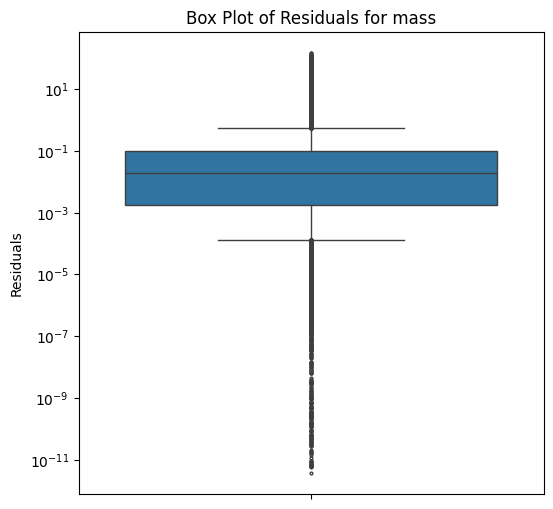

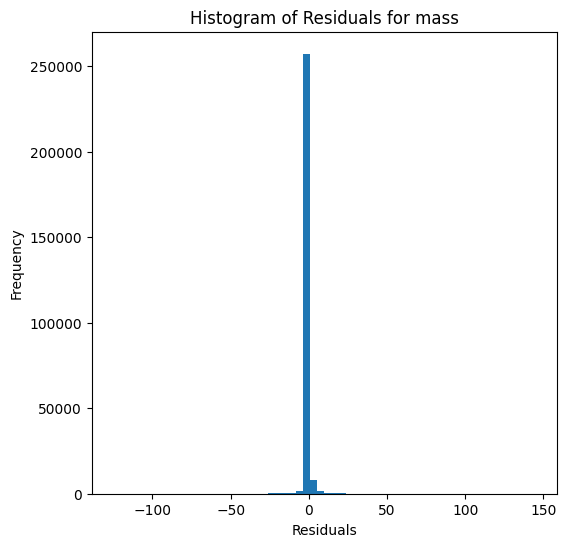

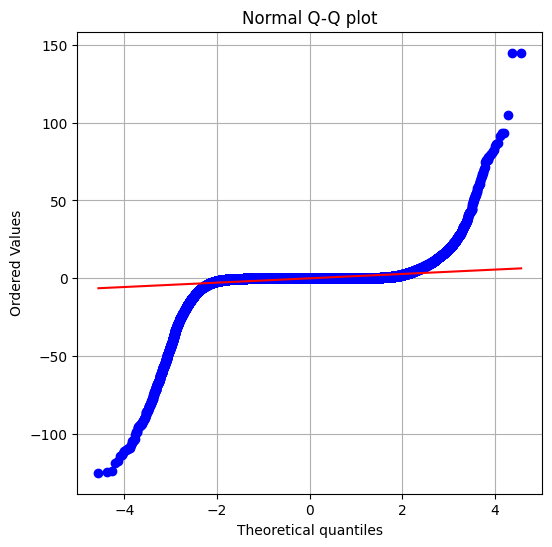


radius results:
RVE :  0.9998304466176052
RMSE :  0.0075393679388525954
MAE :  0.004016482794226766
MedAE :  0.0023413927524396916
CORR :  0.9999152670444643
MAX_ER :  0.3260558360905248
Percentiles : 
  75th percentile :  0.004722165373280962
  90th percentile :  0.008852764149386657
  95th percentile :  0.012600323503464272
  99th percentile :  0.02788339521042918



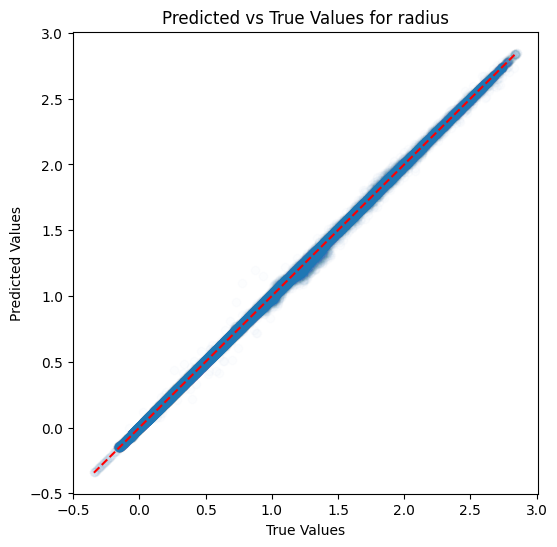

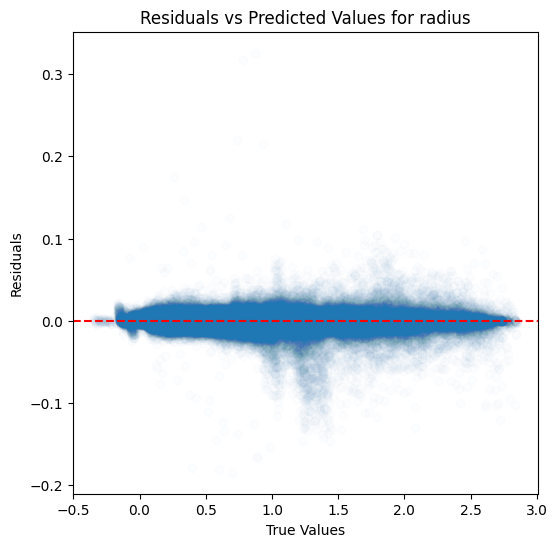

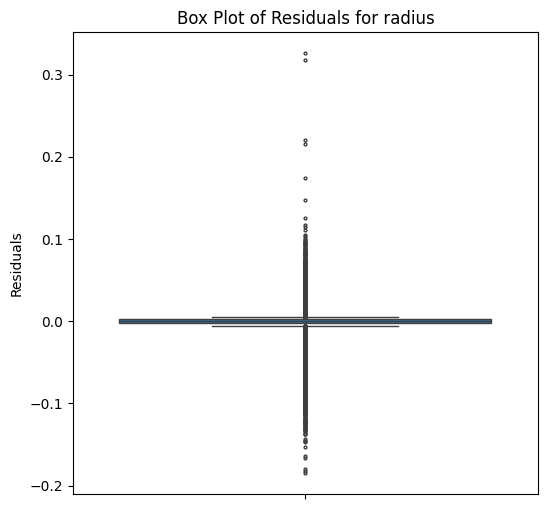

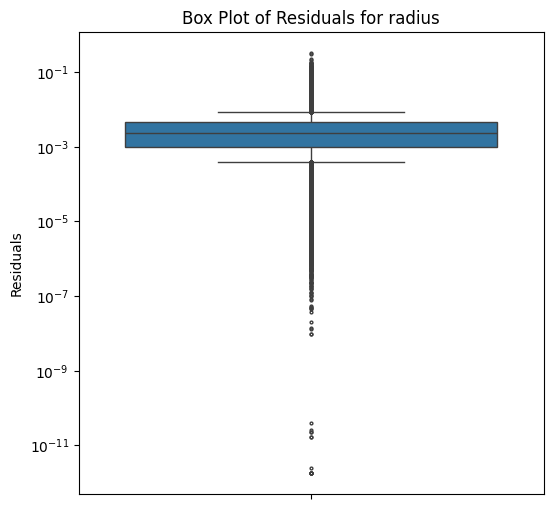

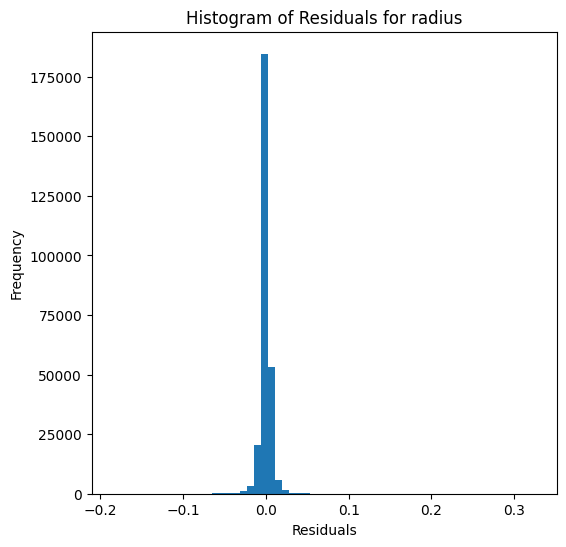

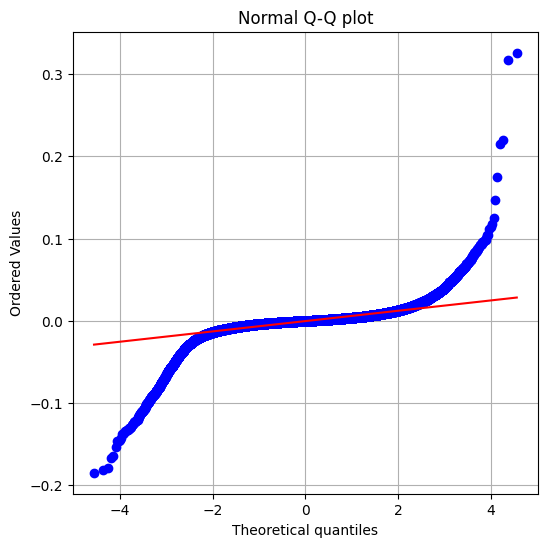

In [16]:
knn_evaluator.evaluate_Kfold_results(KNeighborsRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False) #, override=False, use_preds=True)

### Random forests

In [17]:
rf_evaluator = Model_evaluator("random_forest", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9974153266062031
RMSE :  1.6967152045642038
MAE :  0.24497559302546193
MedAE :  0.007035524899686507
CORR :  0.9987082800799272
MAX_ER :  99.29716777703155
Percentiles : 
  75th percentile :  0.029284128264471576
  90th percentile :  0.20105253492639877
  95th percentile :  0.7797536326297644
  99th percentile :  5.291786357578693



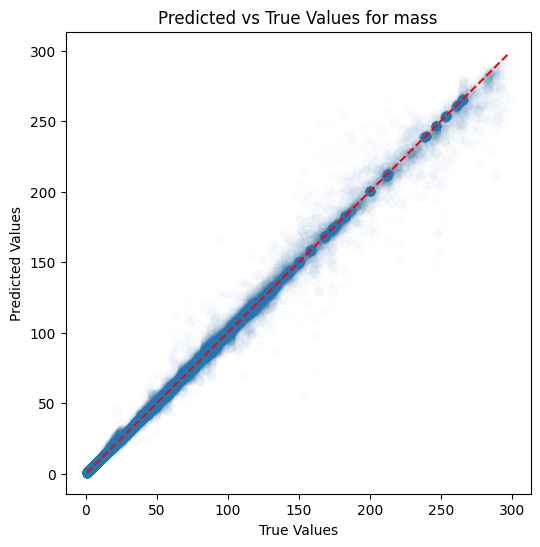

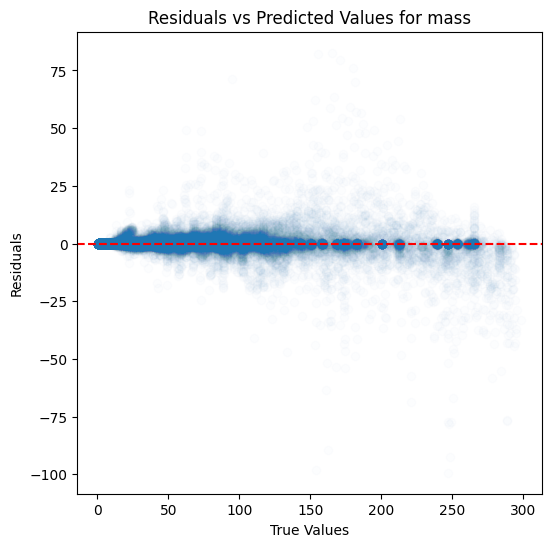

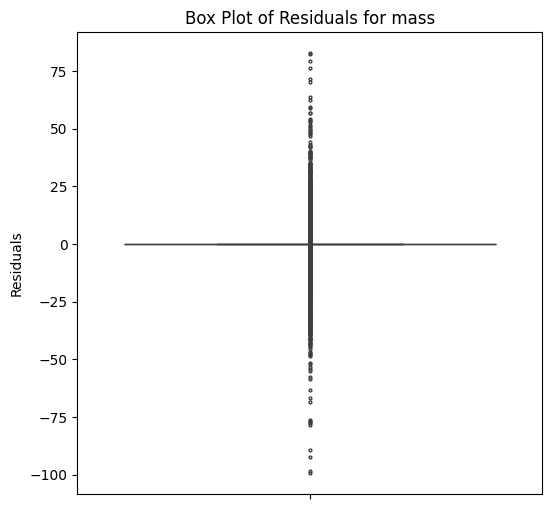

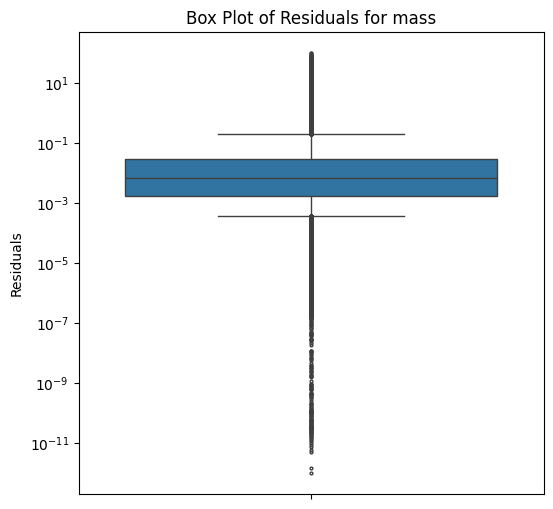

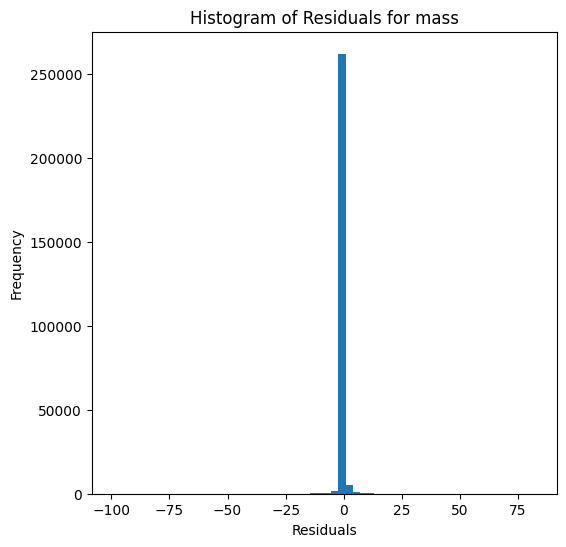

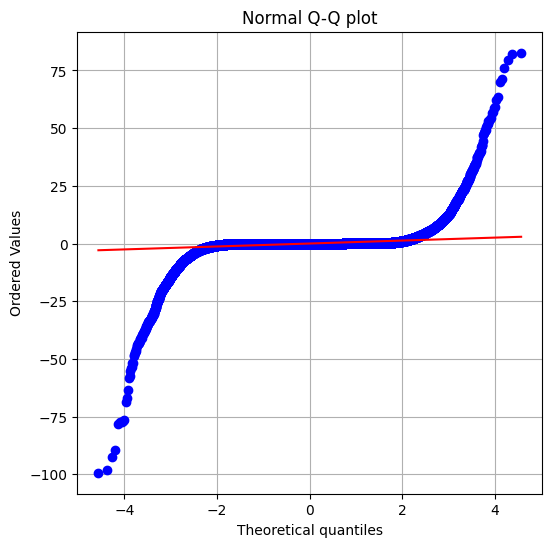


radius results:
RVE :  0.9998991060691521
RMSE :  0.005812527785430147
MAE :  0.002898400716086201
MedAE :  0.0014955605207511713
CORR :  0.9999495716433089
MAX_ER :  0.3967465657143181
Percentiles : 
  75th percentile :  0.0033671997800305276
  90th percentile :  0.006613728325979907
  95th percentile :  0.00985383072038317
  99th percentile :  0.02164264105839954



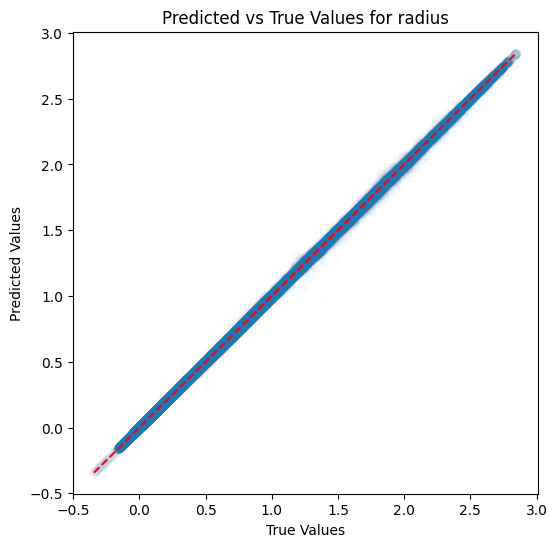

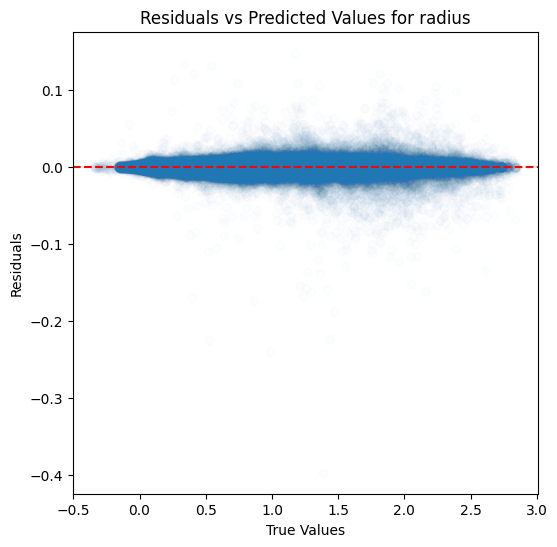

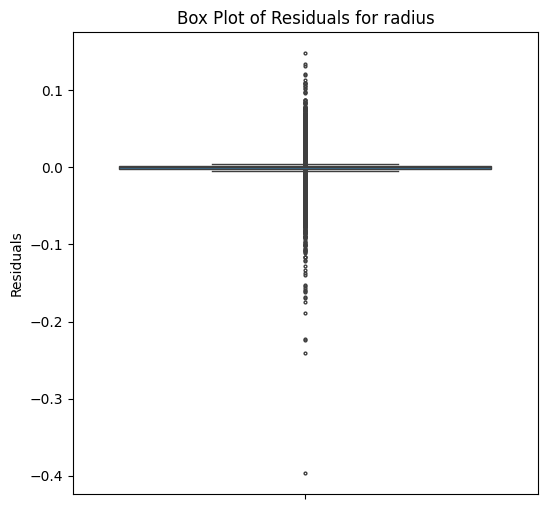

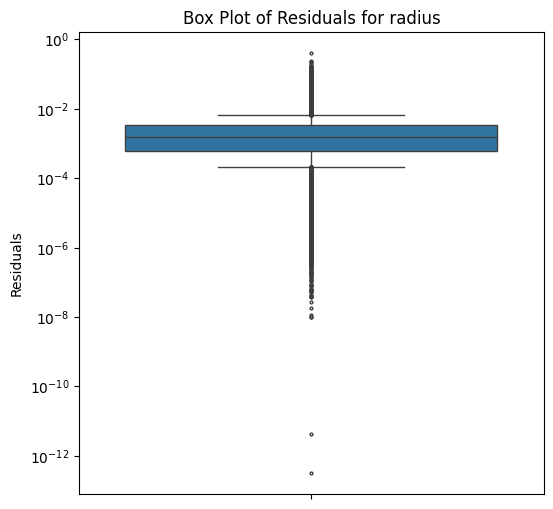

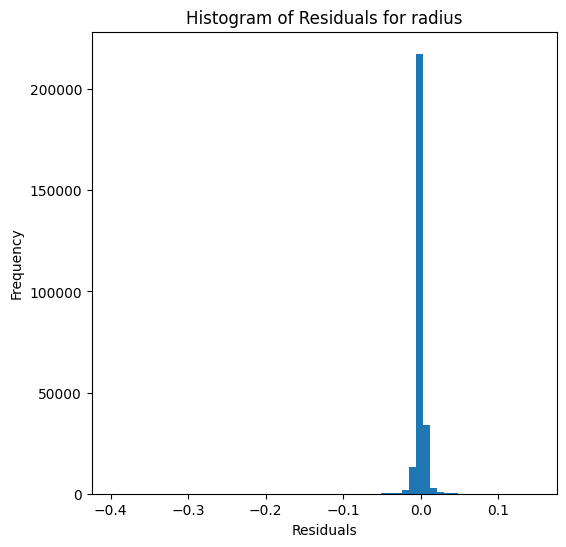

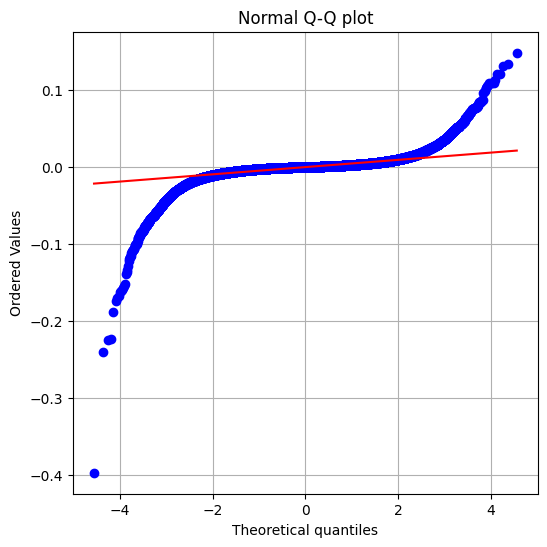

In [18]:
rf_evaluator.evaluate_Kfold_results(RandomForestRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### XGBoost

In [19]:
xgb_evaluator = Model_evaluator("xgboost", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_9 train data :
split 1 2 3 4 5 6 7 8 9 10 
mass results:
RVE :  0.9945315417233914
RMSE :  2.467956718924989
MAE :  0.7874314085210391
MedAE :  0.19362870545519328
CORR :  0.99726209568117
MAX_ER :  75.01227448387272
Percentiles : 
  75th percentile :  0.530814277328175
  90th percentile :  1.665729549720108
  95th percentile :  3.220175677571755
  99th percentile :  10.902340150184605



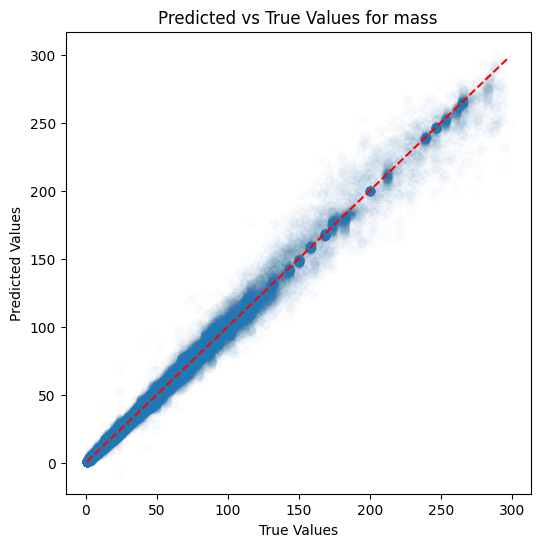

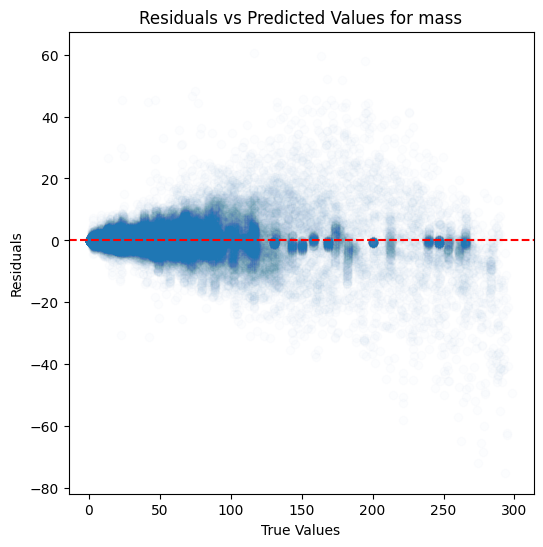

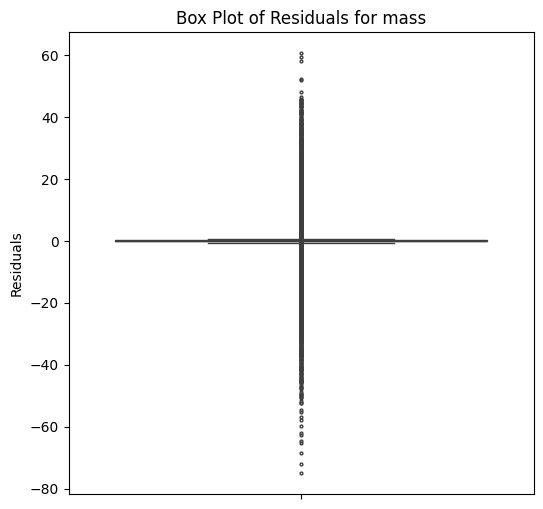

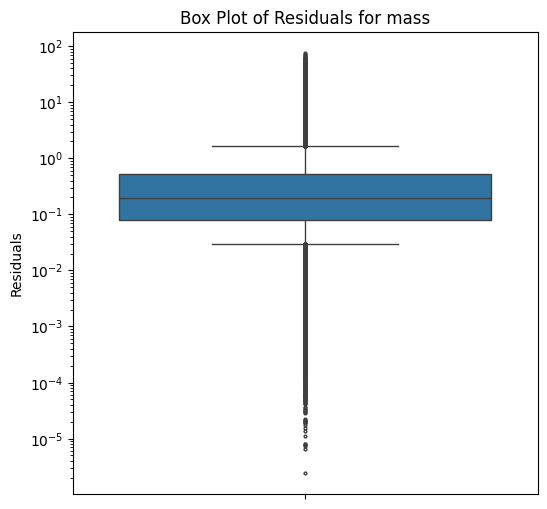

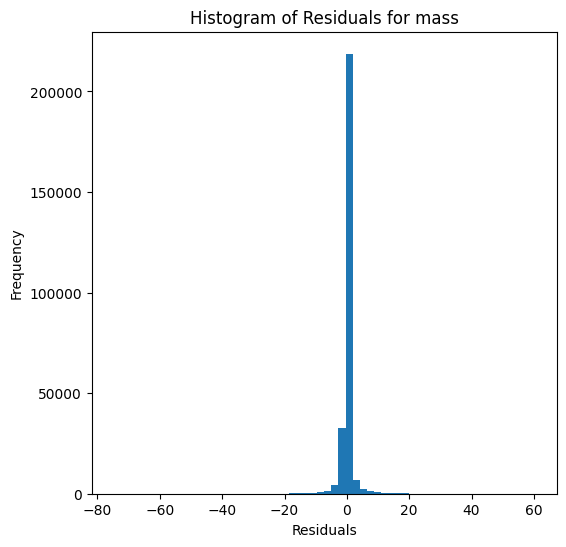

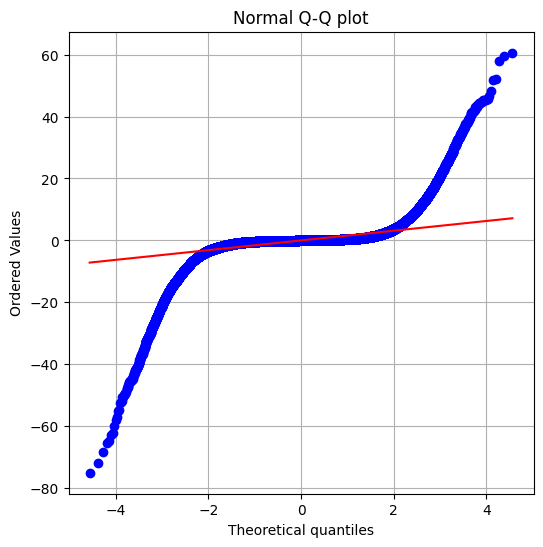


radius results:
RVE :  0.9994569202403787
RMSE :  0.01348130670309999
MAE :  0.009455499778140574
MedAE :  0.00714290707705123
CORR :  0.999728455250119
MAX_ER :  0.5751070088685836
Percentiles : 
  75th percentile :  0.013011626720664526
  90th percentile :  0.020086621878375576
  95th percentile :  0.025400286056170958
  99th percentile :  0.04004720616411036



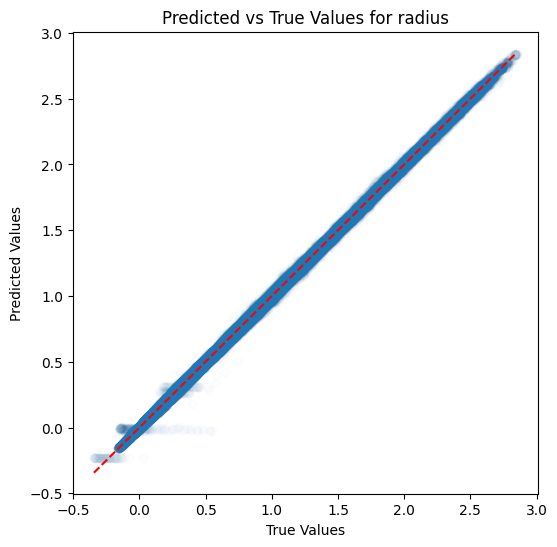

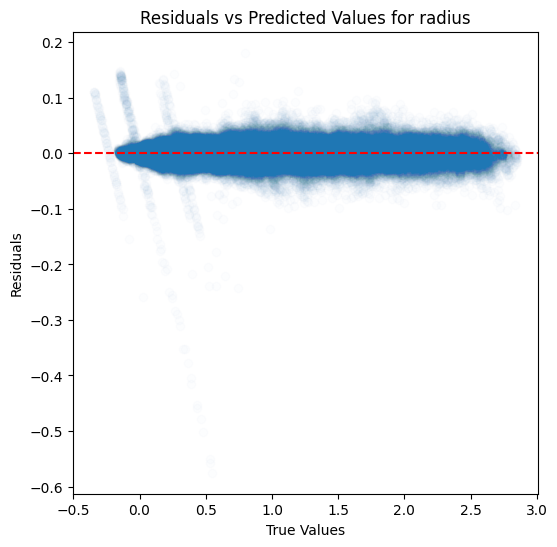

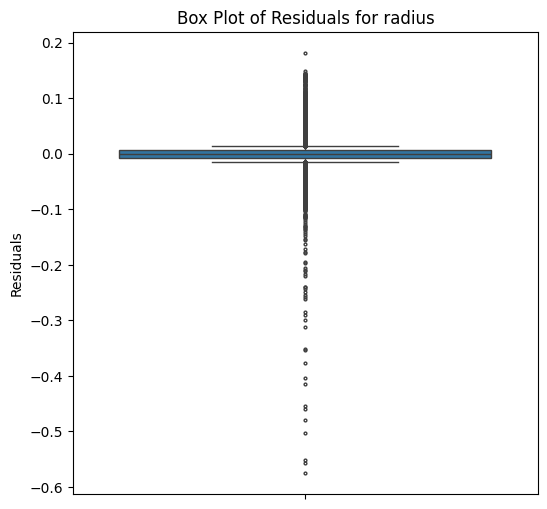

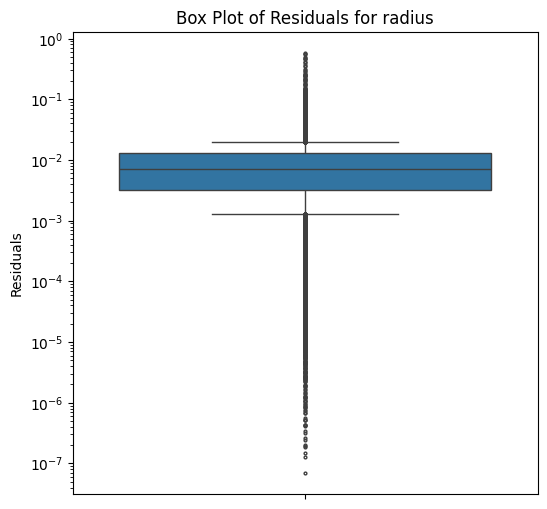

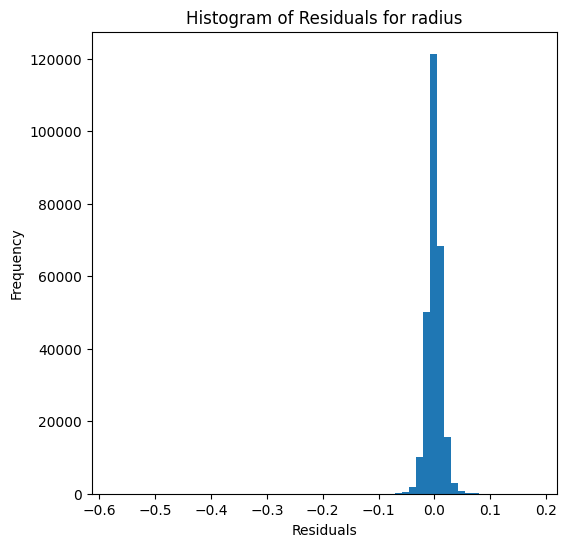

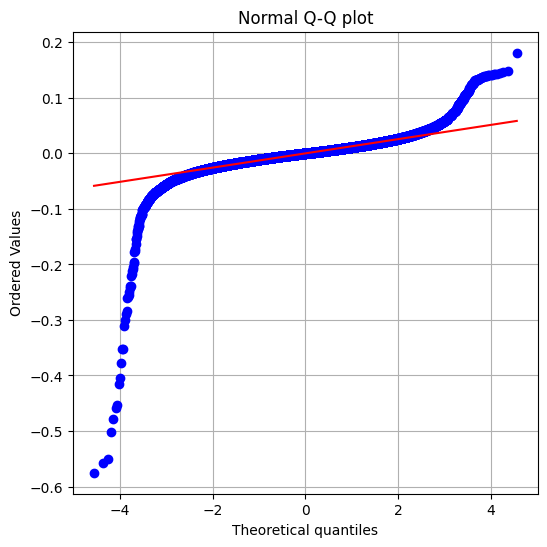

In [20]:
xgb_evaluator.evaluate_Kfold_results(XGBRegressor, X_train, y_train, path_to_predictions, tag, random_state=12, override=True, use_preds=False, n_jobs=5) #, override=False, use_preds=True)

### Multi-layer perceptron

In [21]:
mlp_evaluator = Model_evaluator("mlp", path=path_to_results, physical_model=physical_model)


T_eff_bigger_3_9 train data :
split 1 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


5.542682894619259
2 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


5.042339644200703
3 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


5.289185156701041
4 4.9631201236737805
5 

c:\Users\antoi\Code\unif\MA2\thesis\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


4.82521250491911

mass results:
RVE :  0.9633111289111331
RMSE :  6.459635110907548
MAE :  2.2301356780083657
MedAE :  0.59022112623548
CORR :  0.9822784682133029
MAX_ER :  178.92374393625403
Percentiles : 
  75th percentile :  1.4225896296450813
  90th percentile :  4.913557638010974
  95th percentile :  10.289383464897671
  99th percentile :  29.797416737686415



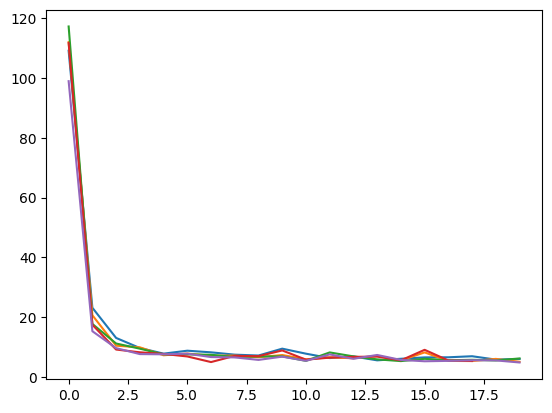

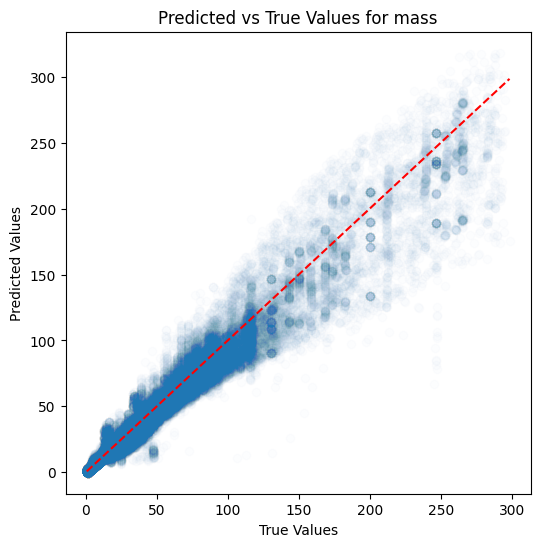

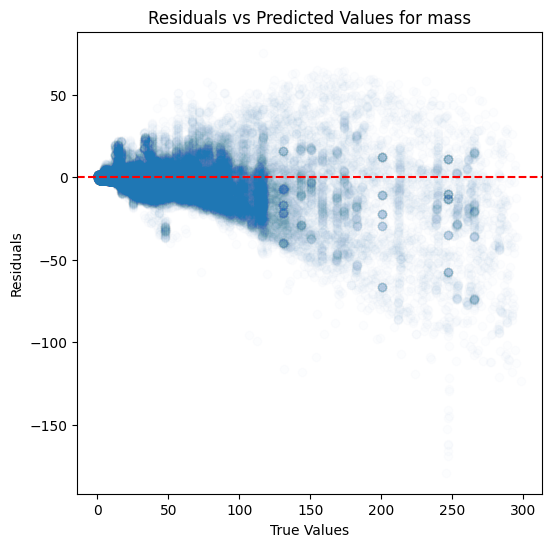

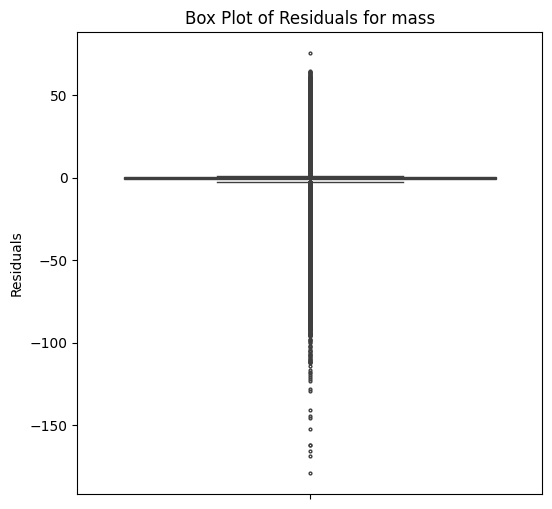

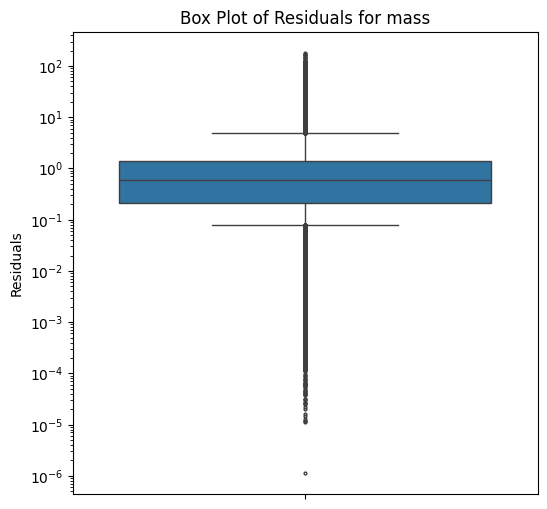

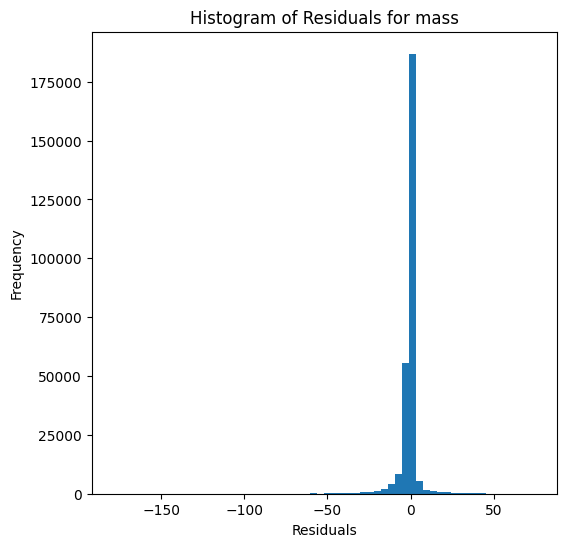

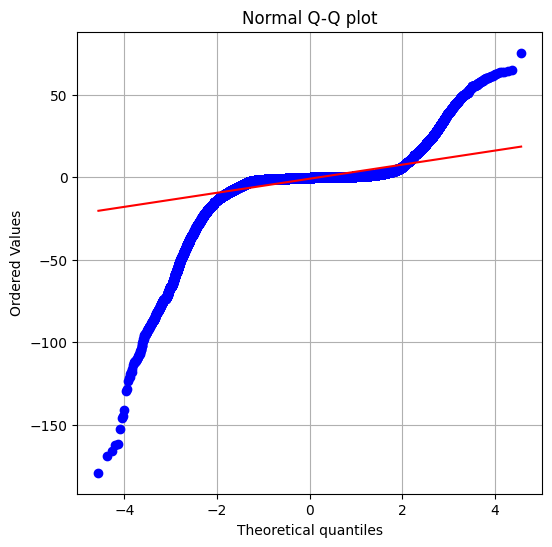


radius results:
RVE :  0.9789339614309038
RMSE :  0.08539861026705663
MAE :  0.06457459601308958
MedAE :  0.05166076306116524
CORR :  0.9894175940389476
MAX_ER :  0.7127752618866204
Percentiles : 
  75th percentile :  0.09040031754327965
  90th percentile :  0.13579052792690055
  95th percentile :  0.168025378338586
  99th percentile :  0.24309022784913353



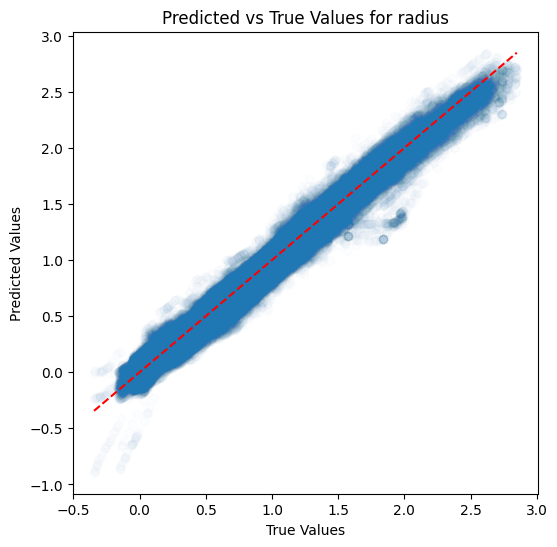

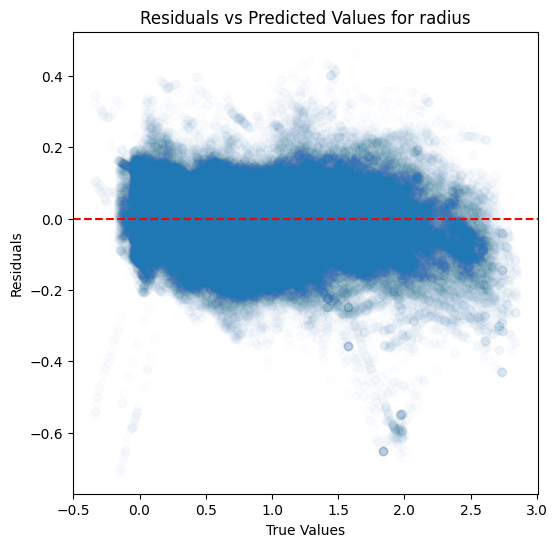

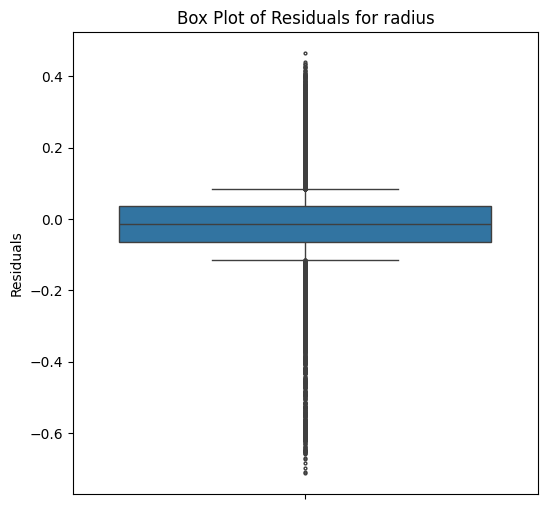

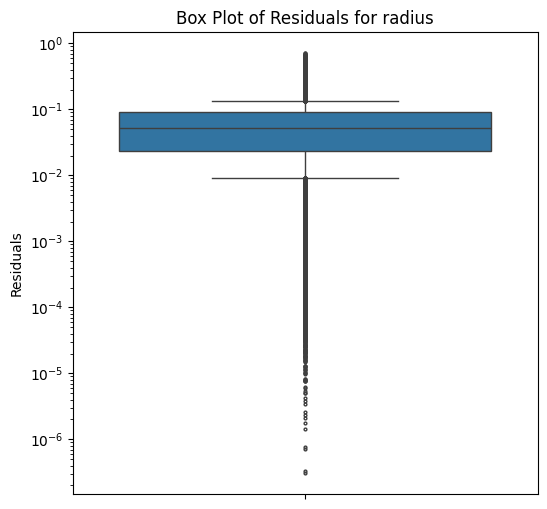

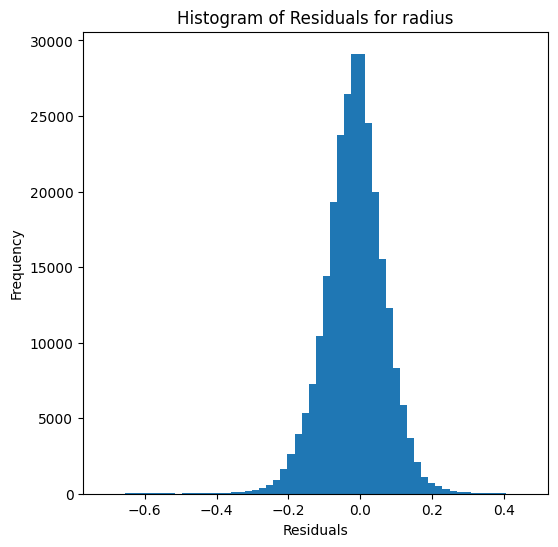

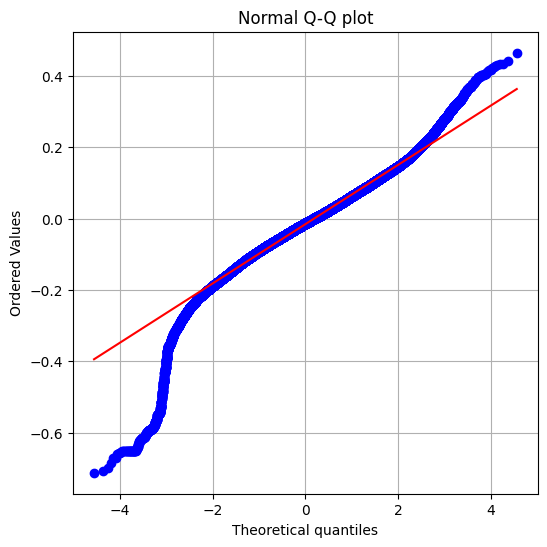

In [22]:
mlp_evaluator.evaluate_Kfold_results(MLPRegressor, X_train, y_train, path_to_predictions, tag, n_splits=5, random_state=12, override=True, use_preds=False, hidden_layer_sizes = (100, 100, 100, 100), max_iter=20, batch_size=400) #, override=False, use_preds=True)